In [ ]:
import dask
from dask.distributed import Client

try:
    client
except NameError:
    print("No dask client defined, starting client")
    client = Client(n_workers=16, threads_per_worker=2, memory_limit='30GB')  # start distributed scheduler locally.
else:
    print("Dask client already defined.")

# Display the client details to confirm it's running
client

No dask client defined, starting client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 32,Total memory: 447.03 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60931,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 447.03 GiB
Comm: tcp://127.0.0.1:61024,Total threads: 2
Dashboard: http://127.0.0.1:61030/status,Memory: 27.94 GiB
Nanny: tcp://127.0.0.1:60934,


2024-08-04 21:57:44,632 - distributed.scheduler - WARNING - Worker failed to heartbeat for 3104s; attempting restart: <WorkerState 'tcp://127.0.0.1:61001', name: 12, status: running, memory: 0, processing: 0>
2024-08-04 21:57:44,636 - distributed.scheduler - WARNING - Worker failed to heartbeat for 3104s; attempting restart: <WorkerState 'tcp://127.0.0.1:61004', name: 3, status: running, memory: 0, processing: 0>
2024-08-04 21:57:44,636 - distributed.scheduler - WARNING - Worker failed to heartbeat for 3104s; attempting restart: <WorkerState 'tcp://127.0.0.1:61005', name: 5, status: running, memory: 0, processing: 0>
2024-08-04 21:57:44,637 - distributed.scheduler - WARNING - Worker failed to heartbeat for 3104s; attempting restart: <WorkerState 'tcp://127.0.0.1:61009', name: 15, status: running, memory: 0, processing: 0>
2024-08-04 21:57:44,637 - distributed.scheduler - WARNING - Worker failed to heartbeat for 3104s; attempting restart: <WorkerState 'tcp://127.0.0.1:61011', name: 7, s

In [2]:
import dask.dataframe as dd
import pandas as pd
import os

print(f'Dask version: {dask.__version__}')
print(f'Pandas version: {pd.__version__}')

# Directory containing CSV files
directory = r'data'

# Define standard columns and data types
standard_columns = [
    'MAC', 'Unix_time_Stamp', 'Date', 'Temp', 'Temp_sym', 
    'Humidity', 'Humidity_sym', 'Pressure', 'Pressure_sym', 
    'IDs_1', 'ID_1', 'Weight_1', 'Wt_sym_1', 
    'IDs_2', 'ID_2', 'Weight_2', 'Wt_sym_2', 
    'IDs_3', 'ID_3', 'Weight_3', 'Wt_sym_3', 
    'IDs_4', 'ID_4', 'Weight_4', 'Wt_sym_4', 
    'IDs_5', 'ID_5', 'Weight_5', 'Wt_sym_5'
]

# Define dtypes
dtypes = {
    'MAC': 'string',
    'Unix_time_Stamp': 'uint64',
    'Temp': 'float64',
    'Temp_sym': 'string',
    'Humidity': 'float64',
    'Humidity_sym': 'string',
    'Pressure': 'int64',
    'Pressure_sym': 'string',
    'IDs_1': 'string',
    'ID_1': 'int64',
    'Weight_1': 'int64',
    'Wt_sym_1': 'string', 
    'IDs_2': 'string',
    'ID_2': 'int64',
    'Weight_2': 'int64',
    'Wt_sym_2': 'string', 
    'IDs_3': 'string',
    'ID_3': 'int64',
    'Weight_3': 'int64',
    'Wt_sym_3': 'string', 
    'IDs_4': 'string',
    'ID_4': 'int64',
    'Weight_4': 'int64',
    'Wt_sym_4': 'string', 
    'IDs_5': 'string',
    'ID_5': 'int64',
    'Weight_5': 'int64',
    'Wt_sym_5': 'string'
}

# List all CSV files in the directory
csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]

# Read all CSV files with Dask
ddf = dd.read_csv(csv_files, header=None, assume_missing=True)

# Rename columns and reorder
ddf = ddf.rename(columns=dict(enumerate(standard_columns)))
ddf = ddf[[col for col in standard_columns if col in ddf.columns]]

# Convert data types
for col, dtype in dtypes.items():
    if dtype == 'int64':
        ddf[col] = dd.to_numeric(ddf[col], errors='coerce').astype('Int64')
    elif dtype == 'float64':
        ddf[col] = dd.to_numeric(ddf[col], errors='coerce').astype('float64')
    else:
        ddf[col] = ddf[col].astype(dtype)

# Convert Pressure to float64 and divide by 1000
ddf['Pressure'] = (ddf['Pressure'] / 1000).astype('float64')
print("4")
# Compute the DataFrame (trigger computation)
combined_df = ddf.compute()
print("5")
# Display the first few rows
display(combined_df.head())


# Identify log events or incorrect entries
log_event_stopped_df = combined_df[combined_df['Pressure_sym'].str.contains('Log event stopped', na=False)]

log_event_start_df = combined_df[combined_df['Pressure_sym'].str.contains('Log event started', na=False)]

# Assume that any row without a standard number of columns or containing 'Log event started' is incorrect
incorrect_entries_df = combined_df[combined_df['Pressure_sym'].str.contains('Log event started', na=False) | (combined_df['Weight_1'].isna())]

# Extract rows that fit the correct structure (excluding log events)
correct_entries_df = combined_df[~combined_df.index.isin(incorrect_entries_df.index)]


import matplotlib.pyplot as plt

# Display the first few rows of each DataFrame
print("Log Event Starts:")
display(log_event_start_df.head())

print("Log Event Stopped:")
display(log_event_stopped_df.head())


print("Incorrect Entries:")
display(incorrect_entries_df.head())

print("Correct Entries:")
display(correct_entries_df.head())

# Optional: Save these DataFrames to separate CSV files for further analysis
log_event_start_df.to_csv('log_event_starts.csv', index=False)
log_event_stopped_df.to_csv('log_event_stopped.csv', index=False)
incorrect_entries_df.to_csv('incorrect_entries.csv', index=False)
correct_entries_df.to_csv('correct_entries.csv', index=False)


Dask version: 2024.5.0
Pandas version: 2.2.2
4
5


,MAC,Unix_time_Stamp,Date,Temp,Temp_sym,Humidity,Humidity_sym,Pressure,Pressure_sym,IDs_1,...,Weight_3,Wt_sym_3,IDs_4,ID_4,Weight_4,Wt_sym_4,IDs_5,ID_5,Weight_5,Wt_sym_5
0,7C:DF:A1:E0:91:AC,1674573949,2023-01-24T15:25:49Z,22.2,C,30.0,%,96.121,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,7C:DF:A1:E0:91:AC,1674573949,2023-01-24T15:25:49Z,22.2,C,30.0,%,96.121,hPa,id,...,580,g,id,4,517,g,id,5,399,g
2,7C:DF:A1:E0:91:AC,1674574200,2023-01-24T15:30:00Z,22.1,C,30.7,%,96.144,hPa,id,...,579,g,id,4,516,g,id,5,399,g
3,7C:DF:A1:E0:91:AC,1674576000,2023-01-24T16:00:00Z,22.1,C,29.1,%,96.272,hPa,id,...,576,g,id,4,512,g,id,5,398,g
4,7C:DF:A1:E0:91:AC,1674577800,2023-01-24T16:30:00Z,21.1,C,29.6,%,96.379,hPa,id,...,573,g,id,4,509,g,id,5,397,g


Log Event Starts:


,MAC,Unix_time_Stamp,Date,Temp,Temp_sym,Humidity,Humidity_sym,Pressure,Pressure_sym,IDs_1,...,Weight_3,Wt_sym_3,IDs_4,ID_4,Weight_4,Wt_sym_4,IDs_5,ID_5,Weight_5,Wt_sym_5
0,7C:DF:A1:E0:91:AC,1674573949,2023-01-24T15:25:49Z,22.2,C,30.0,%,96.121,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
20,7C:DF:A1:E0:91:AC,1675675800,2023-02-06T09:15:00Z,18.8,C,25.9,%,98.905,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
40,7C:DF:A1:E0:91:AC,1679082025,2023-03-17T19:40:25Z,20.9,C,27.0,%,97.688,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
20,7C:DF:A1:E0:91:AC,1679995436,2023-03-28T09:23:56Z,20.4,C,28.1,%,98.778,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
41,7C:DF:A1:E0:91:AC,1682280615,2023-04-23T20:10:15Z,20.7,C,31.6,%,99.950,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Log Event Stopped:


,MAC,Unix_time_Stamp,Date,Temp,Temp_sym,Humidity,Humidity_sym,Pressure,Pressure_sym,IDs_1,...,Weight_3,Wt_sym_3,IDs_4,ID_4,Weight_4,Wt_sym_4,IDs_5,ID_5,Weight_5,Wt_sym_5
19,7C:DF:A1:E0:91:AC,1675675800,2023-02-06T09:10:00Z,18.8,C,25.9,%,98.905,hPaLog event stopped.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
24,7C:DF:A1:E0:91:AC,1676462400,2023-02-15T12:00:00Z,19.0,C,21.9,%,99.049,hPaLog event stopped.,id,...,2,g,id,4,-2,g,id,5,1,g
19,6C:DF:A1:E0:91:AC,1679995435,2023-03-28T09:13:56Z,19.4,C,27.1,%,98.777,hPaLog event stopped.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
43,6C:DF:A1:E0:91:AC,1680989399,2023-04-08T21:30:00Z,18.4,C,22.1,%,98.951,hPaLog event stopped.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
23,7C:DF:A1:E0:91:AC,1683630882,2023-05-09T11:14:42Z,21.3,C,27.4,%,96.955,hPaLog event stopped.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Incorrect Entries:


,MAC,Unix_time_Stamp,Date,Temp,Temp_sym,Humidity,Humidity_sym,Pressure,Pressure_sym,IDs_1,...,Weight_3,Wt_sym_3,IDs_4,ID_4,Weight_4,Wt_sym_4,IDs_5,ID_5,Weight_5,Wt_sym_5
0,7C:DF:A1:E0:91:AC,1674573949,2023-01-24T15:25:49Z,22.2,C,30.0,%,96.121,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
19,7C:DF:A1:E0:91:AC,1675675800,2023-02-06T09:10:00Z,18.8,C,25.9,%,98.905,hPaLog event stopped.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
20,7C:DF:A1:E0:91:AC,1675675800,2023-02-06T09:15:00Z,18.8,C,25.9,%,98.905,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
40,7C:DF:A1:E0:91:AC,1679082025,2023-03-17T19:40:25Z,20.9,C,27.0,%,97.688,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
19,6C:DF:A1:E0:91:AC,1679995435,2023-03-28T09:13:56Z,19.4,C,27.1,%,98.777,hPaLog event stopped.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Correct Entries:


,MAC,Unix_time_Stamp,Date,Temp,Temp_sym,Humidity,Humidity_sym,Pressure,Pressure_sym,IDs_1,...,Weight_3,Wt_sym_3,IDs_4,ID_4,Weight_4,Wt_sym_4,IDs_5,ID_5,Weight_5,Wt_sym_5
2,7C:DF:A1:E0:91:AC,1674574200,2023-01-24T15:30:00Z,22.1,C,30.7,%,96.144,hPa,id,...,579,g,id,4,516,g,id,5,399,g
3,7C:DF:A1:E0:91:AC,1674576000,2023-01-24T16:00:00Z,22.1,C,29.1,%,96.272,hPa,id,...,576,g,id,4,512,g,id,5,398,g
4,7C:DF:A1:E0:91:AC,1674577800,2023-01-24T16:30:00Z,21.1,C,29.6,%,96.379,hPa,id,...,573,g,id,4,509,g,id,5,397,g
5,7C:DF:A1:E0:91:AC,1674579600,2023-01-24T17:00:00Z,20.6,C,29.8,%,96.458,hPa,id,...,571,g,id,4,506,g,id,5,396,g
6,7C:DF:A1:E0:91:AC,1674581400,2023-01-24T17:30:00Z,20.2,C,30.5,%,96.552,hPa,id,...,568,g,id,4,504,g,id,5,395,g


In [3]:
# Print the first few rows of the combined DataFrame
print(combined_df.shape)
display(combined_df.head())
display(combined_df.tail())

(26731, 29)


,MAC,Unix_time_Stamp,Date,Temp,Temp_sym,Humidity,Humidity_sym,Pressure,Pressure_sym,IDs_1,...,Weight_3,Wt_sym_3,IDs_4,ID_4,Weight_4,Wt_sym_4,IDs_5,ID_5,Weight_5,Wt_sym_5
0,7C:DF:A1:E0:91:AC,1674573949,2023-01-24T15:25:49Z,22.2,C,30.0,%,96.121,hPaLog event started.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,7C:DF:A1:E0:91:AC,1674573949,2023-01-24T15:25:49Z,22.2,C,30.0,%,96.121,hPa,id,...,580,g,id,4,517,g,id,5,399,g
2,7C:DF:A1:E0:91:AC,1674574200,2023-01-24T15:30:00Z,22.1,C,30.7,%,96.144,hPa,id,...,579,g,id,4,516,g,id,5,399,g
3,7C:DF:A1:E0:91:AC,1674576000,2023-01-24T16:00:00Z,22.1,C,29.1,%,96.272,hPa,id,...,576,g,id,4,512,g,id,5,398,g
4,7C:DF:A1:E0:91:AC,1674577800,2023-01-24T16:30:00Z,21.1,C,29.6,%,96.379,hPa,id,...,573,g,id,4,509,g,id,5,397,g


,MAC,Unix_time_Stamp,Date,Temp,Temp_sym,Humidity,Humidity_sym,Pressure,Pressure_sym,IDs_1,...,Weight_3,Wt_sym_3,IDs_4,ID_4,Weight_4,Wt_sym_4,IDs_5,ID_5,Weight_5,Wt_sym_5
44,7C:DF:A1:E0:91:AC,1722722400,2024-08-03T22:00:00Z,26.2,C,47.4,%,98.575,hPa,id,...,0,g,id,4,102,g,id,5,536,g
45,7C:DF:A1:E0:91:AC,1722724200,2024-08-03T22:30:00Z,26.2,C,47.4,%,98.542,hPa,id,...,0,g,id,4,102,g,id,5,536,g
46,7C:DF:A1:E0:91:AC,1722726000,2024-08-03T23:00:00Z,26.2,C,47.5,%,98.550,hPa,id,...,0,g,id,4,102,g,id,5,536,g
47,7C:DF:A1:E0:91:AC,1722727800,2024-08-03T23:30:00Z,26.2,C,47.3,%,98.537,hPa,id,...,0,g,id,4,102,g,id,5,536,g
48,7C:DF:A1:E0:91:AC,1722727800,2024-08-03T23:45:00Z,26.2,C,47.3,%,98.537,hPaLog event stopped.,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


C:\Users\Neil\AppData\Local\Temp\ipykernel_18348\704754463.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_event_start_df['Date'] = pd.to_datetime(log_event_start_df['Date'])
C:\Users\Neil\AppData\Local\Temp\ipykernel_18348\704754463.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_event_stopped_df['Date'] = pd.to_datetime(log_event_stopped_df['Date'])


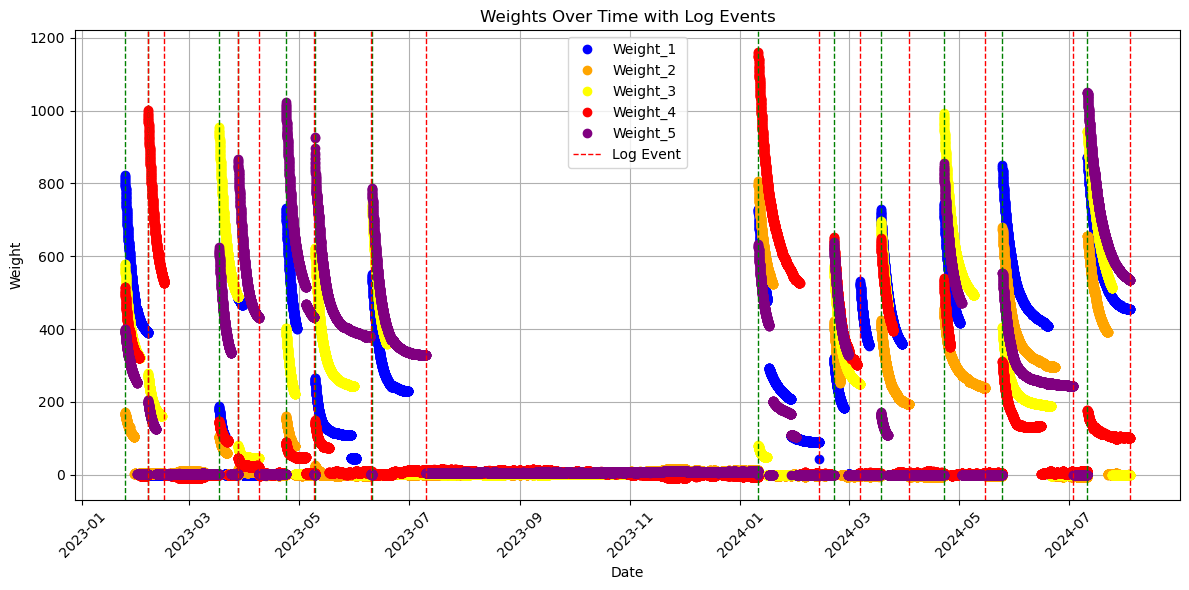

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
# Ensure 'Date' is a datetime column for proper plotting
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
filtered_df=combined_df
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
log_event_start_df['Date'] = pd.to_datetime(log_event_start_df['Date'])
log_event_stopped_df['Date'] = pd.to_datetime(log_event_stopped_df['Date'])


# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['Weight_1'], marker='o', linestyle='', color='b', label='Weight_1')
plt.plot(filtered_df['Date'], filtered_df['Weight_2'], marker='o', linestyle='', color='orange', label='Weight_2')
plt.plot(filtered_df['Date'], filtered_df['Weight_3'], marker='o', linestyle='', color='yellow', label='Weight_3')
plt.plot(filtered_df['Date'], filtered_df['Weight_4'], marker='o', linestyle='', color='red', label='Weight_4')
plt.plot(filtered_df['Date'], filtered_df['Weight_5'], marker='o', linestyle='', color='purple', label='Weight_5')

# Add vertical lines for each entry in log_event_start_df
for log_date in log_event_start_df['Date']:
    plt.axvline(x=log_date, color='green', linestyle='--', linewidth=1, label='Log Event')

# Add vertical lines for each entry in log_event_start_df
for log_date in log_event_stopped_df['Date']:
    plt.axvline(x=log_date, color='red', linestyle='--', linewidth=1, label='Log Event')

plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('Weights Over Time with Log Events')
plt.grid(True)
plt.xticks(rotation=45)

# Handle legend: Remove duplicate labels for vertical lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.tight_layout()
plt.show()


C:\Users\Neil\AppData\Local\Temp\ipykernel_18348\654627756.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_event_start_df['Date'] = pd.to_datetime(log_event_start_df['Date']).dt.tz_localize(None)
C:\Users\Neil\AppData\Local\Temp\ipykernel_18348\654627756.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_event_stopped_df['Date'] = pd.to_datetime(log_event_stopped_df['Date']).dt.tz_localize(None)


Start: 2023-01-24 15:30:00
End: 2023-02-06 09:00:00


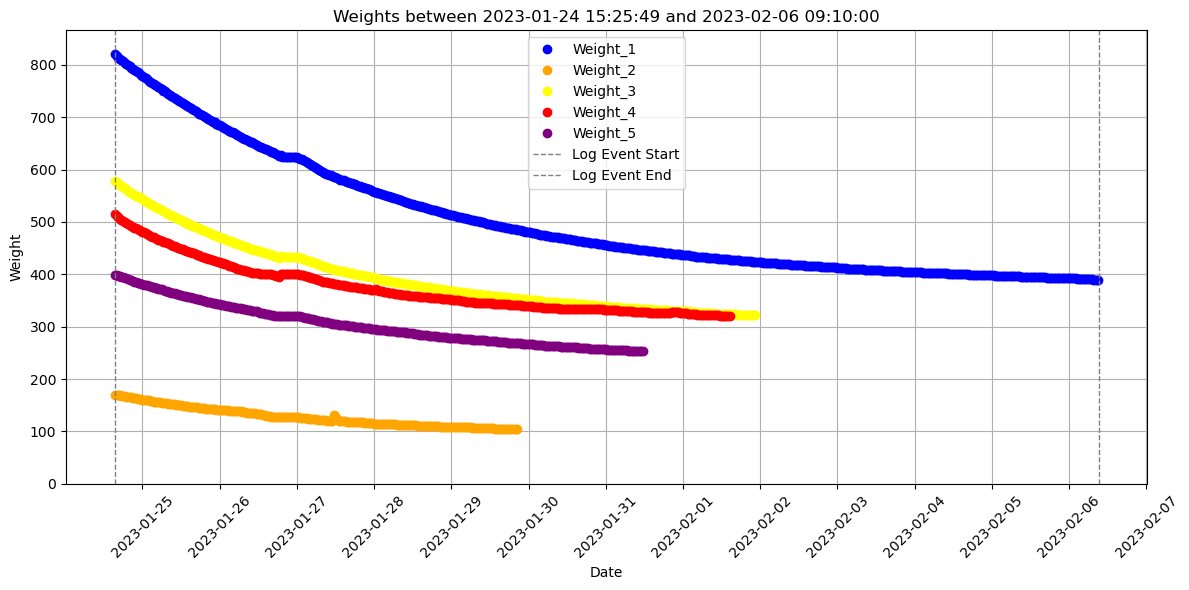

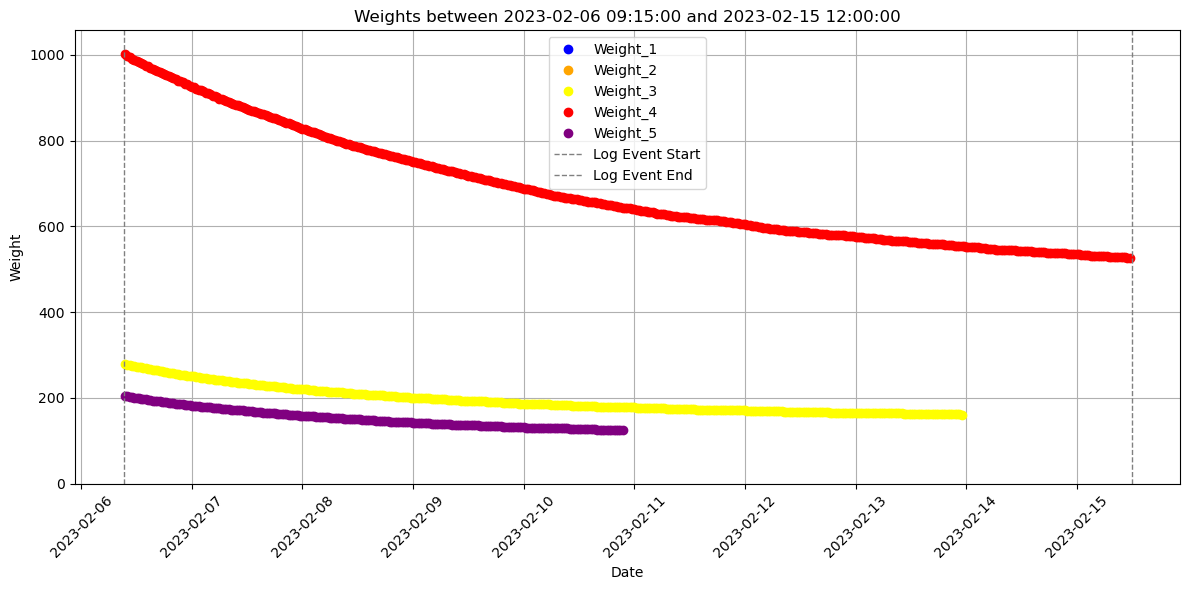

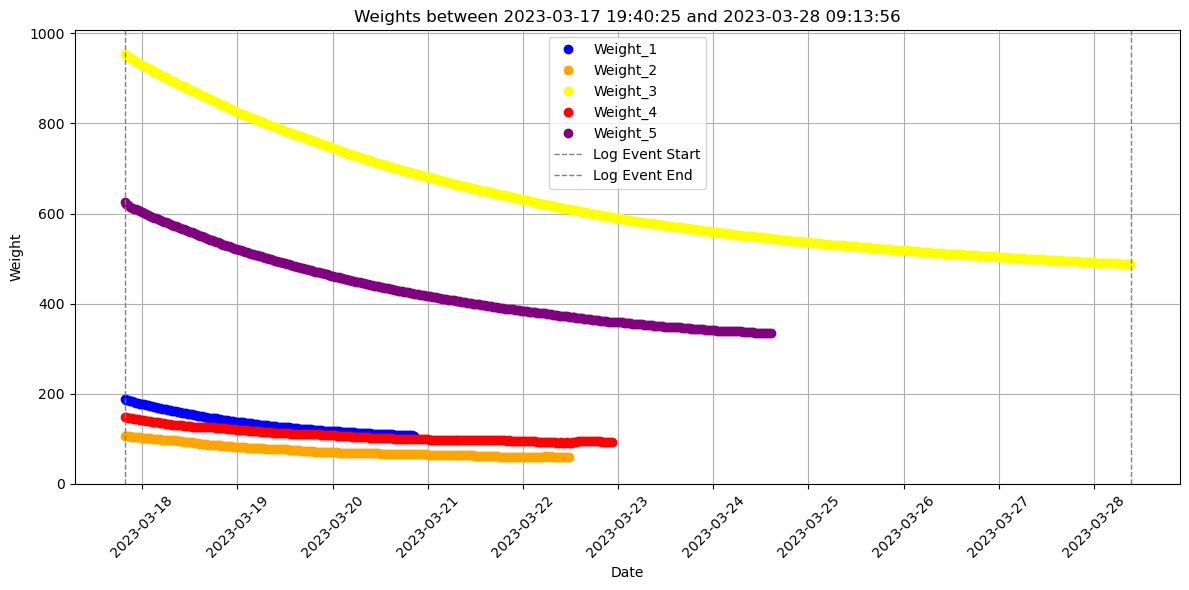

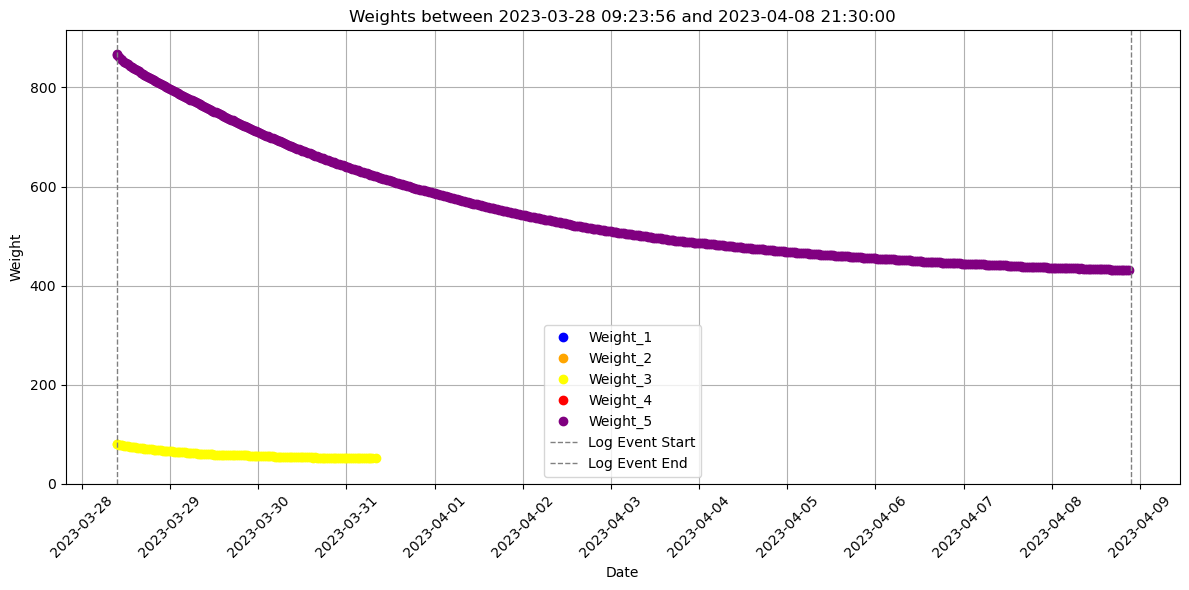

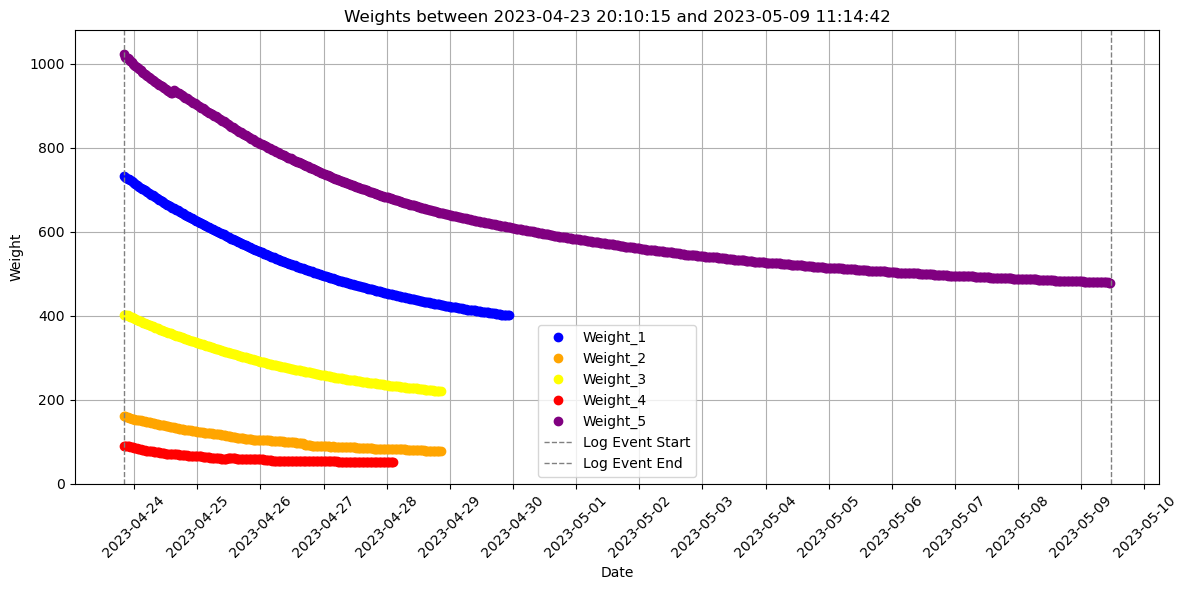

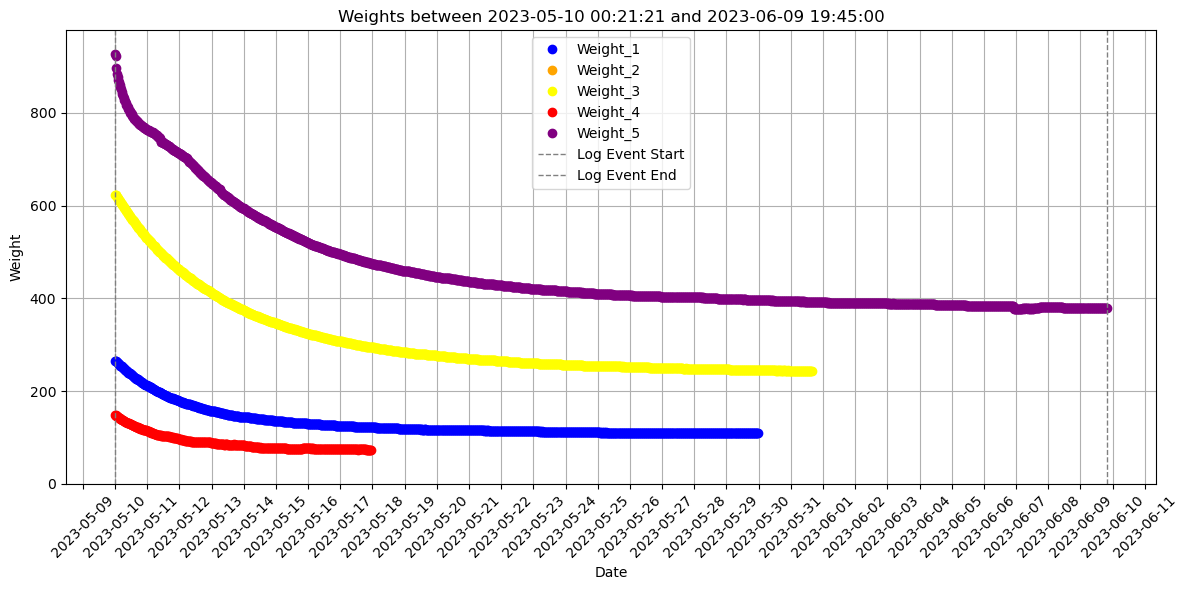

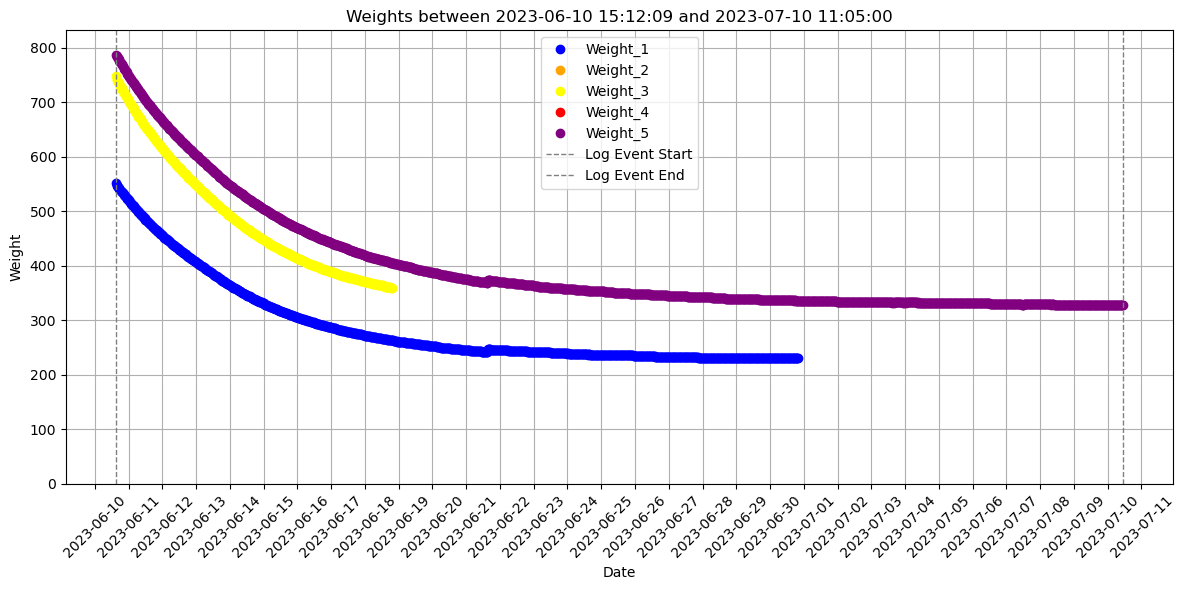

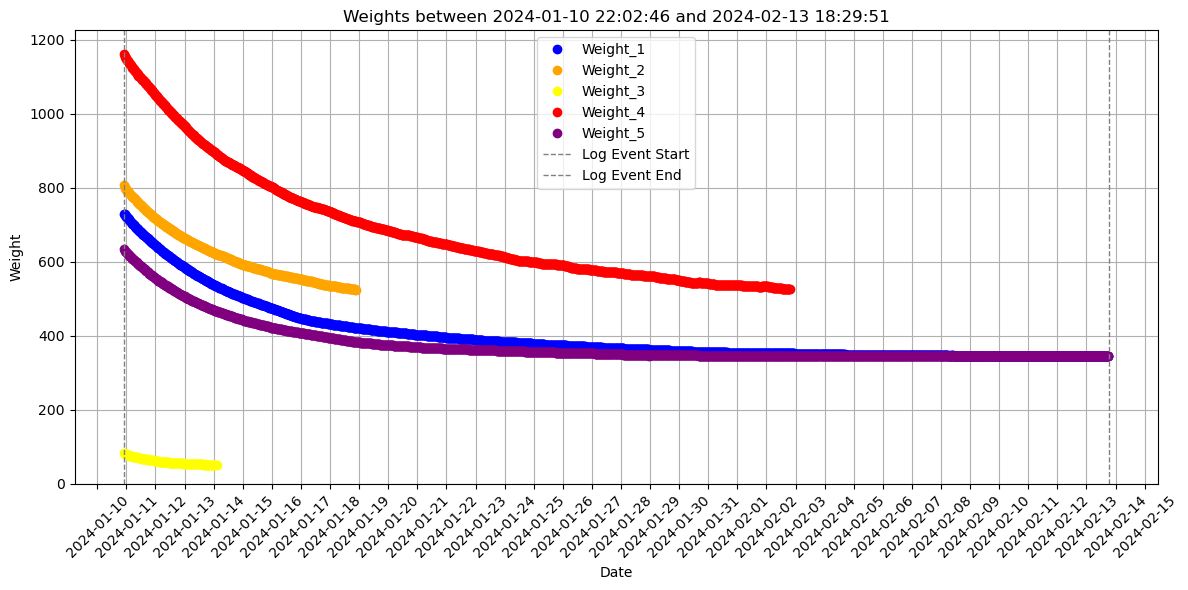

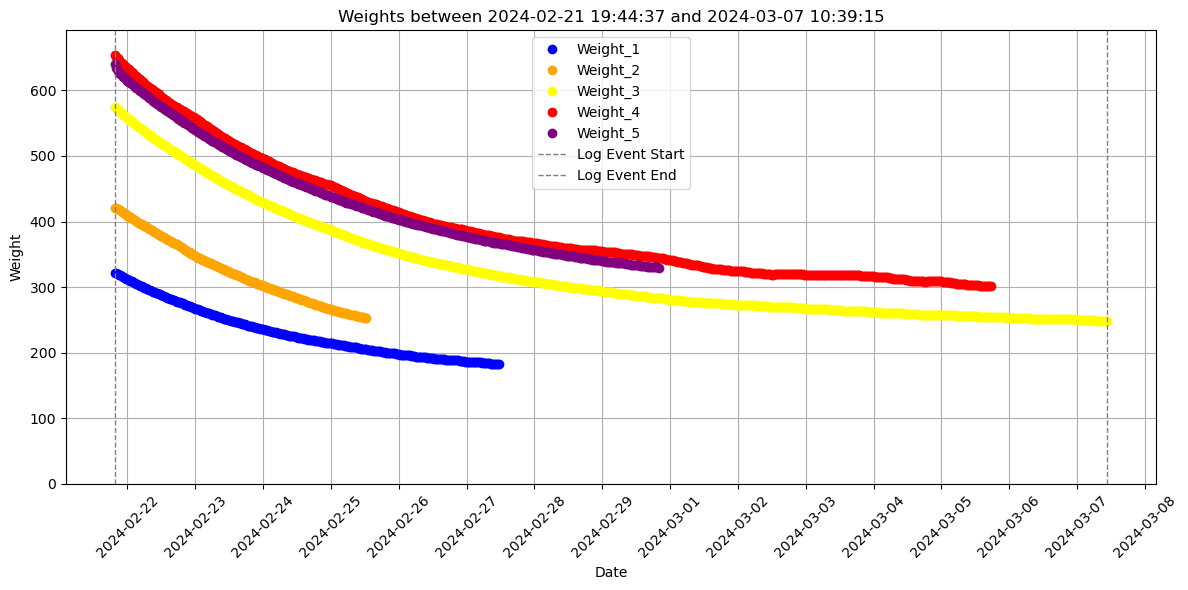

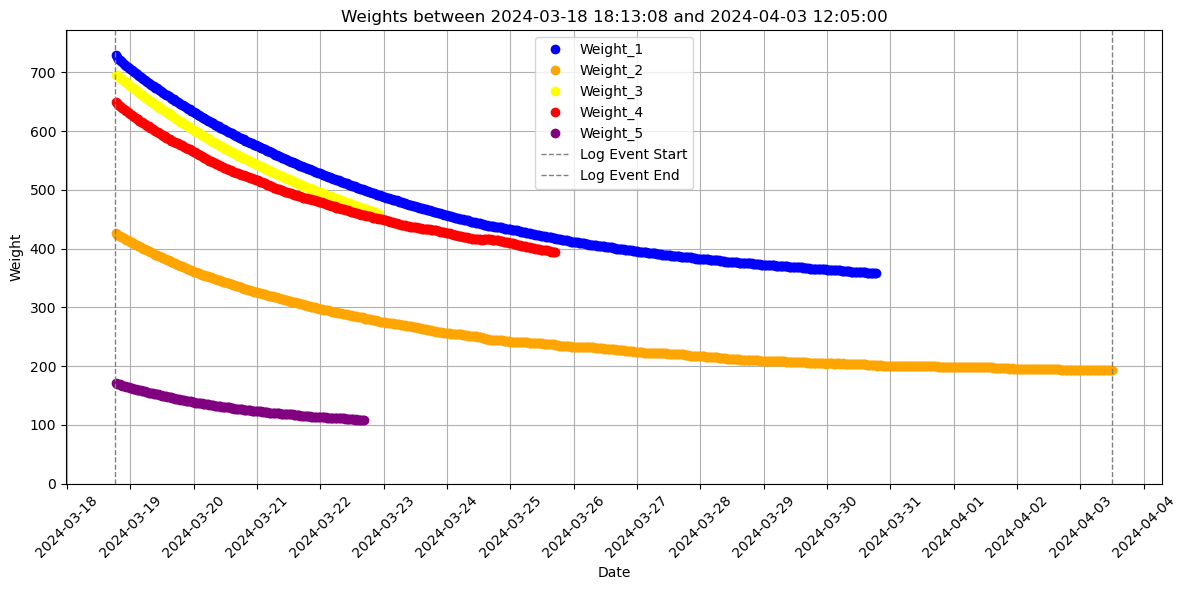

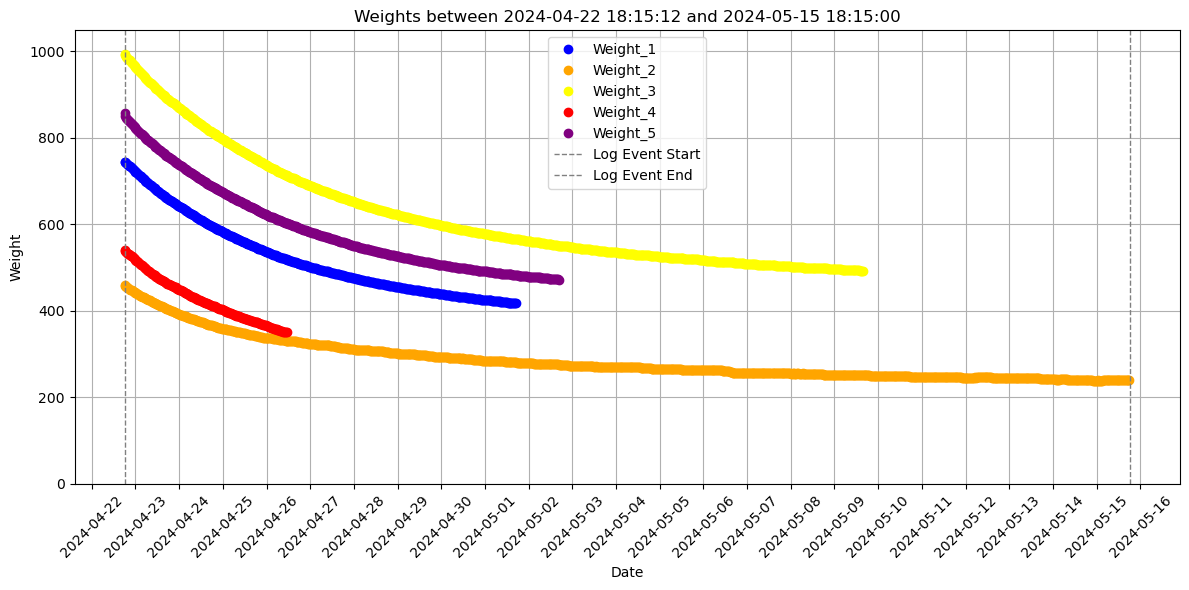

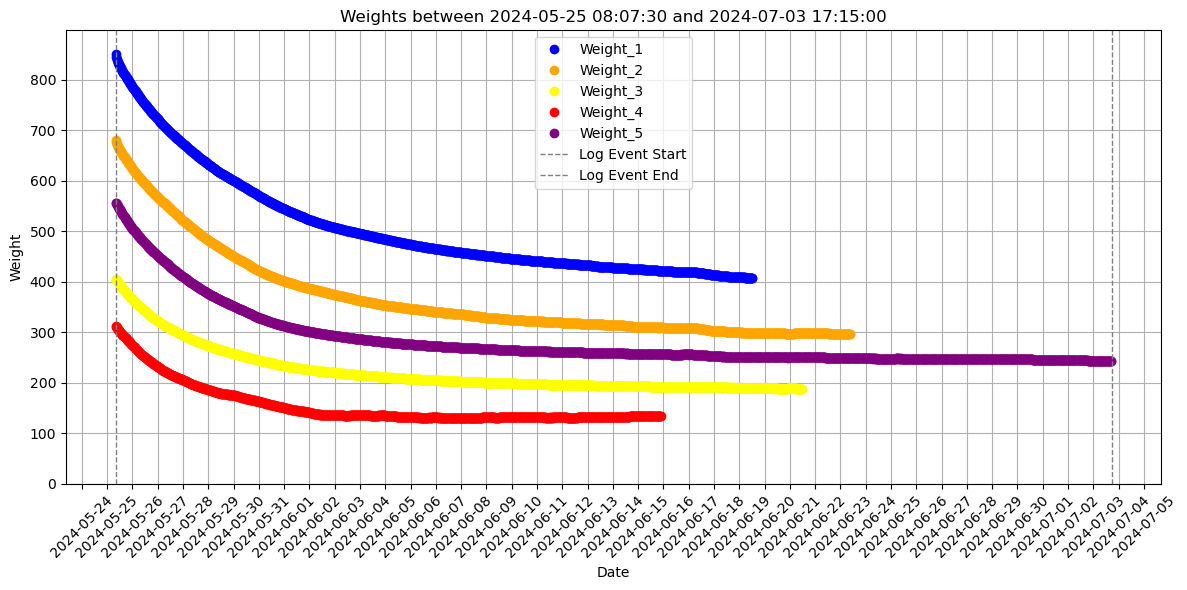

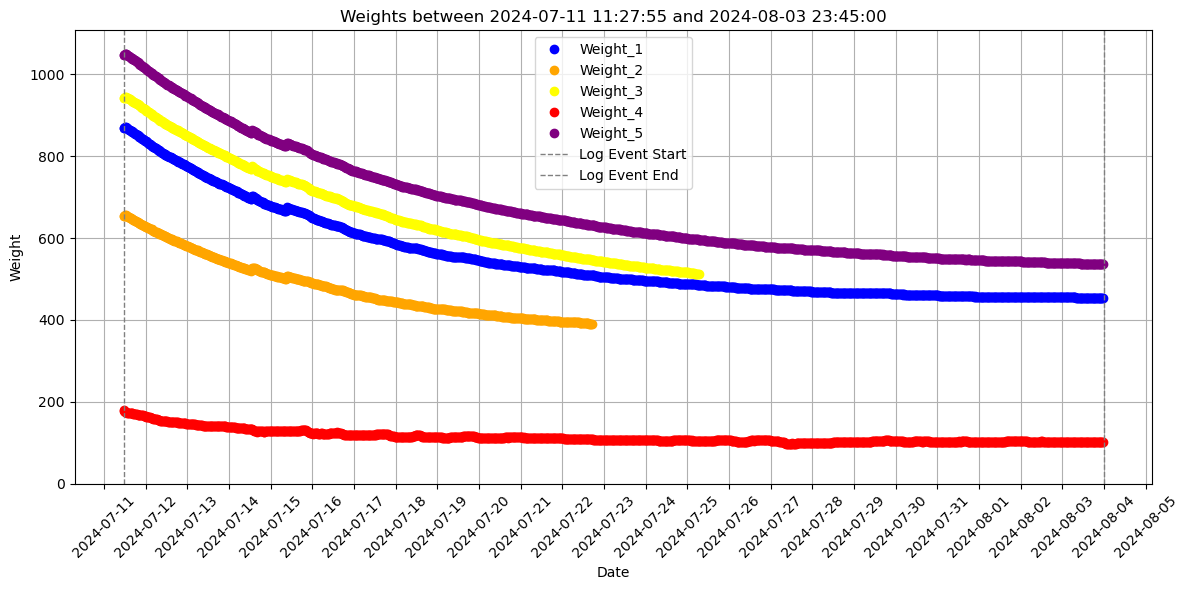

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width of the display
pd.set_option('display.max_colwidth', None)  # Show the full content of each cell


# Ensure 'Date' is a datetime column for proper plotting
combined_df['Date'] = pd.to_datetime(combined_df['Date']).dt.tz_localize(None)
log_event_start_df['Date'] = pd.to_datetime(log_event_start_df['Date']).dt.tz_localize(None)
log_event_stopped_df['Date'] = pd.to_datetime(log_event_stopped_df['Date']).dt.tz_localize(None)

# Filter the combined_df to include only rows where weights are greater than 50
filtered_df = combined_df[
    (combined_df['Weight_1'] > 50) | 
    (combined_df['Weight_2'] > 50) | 
    (combined_df['Weight_3'] > 50) | 
    (combined_df['Weight_4'] > 50) | 
    (combined_df['Weight_5'] > 50)
].copy()  # Create a copy of the filtered DataFrame

# Replace weights below 50 with -100 for visualization purposes
weights = ['Weight_1', 'Weight_2', 'Weight_3', 'Weight_4', 'Weight_5']
for weight in weights:
    filtered_df.loc[filtered_df[weight] <= 50, weight] = -100

# Sort log_event_start_df by 'Date'
log_event_start_df = log_event_start_df.sort_values(by='Date')
log_event_stopped_df = log_event_stopped_df.sort_values(by='Date')

#------------Filter date ranges
# Define the date range
start_date = pd.Timestamp('2021-04-20')
end_date = pd.Timestamp('2025-05-14')

# Filter log_event_start_df
log_event_start_fil_df = log_event_start_df[(log_event_start_df['Date'] >= start_date) & (log_event_start_df['Date'] <= end_date)]

# Filter log_event_stopped_df
log_event_stopped_fil_df = log_event_stopped_df[(log_event_stopped_df['Date'] >= start_date) & (log_event_stopped_df['Date'] <= end_date)]
#------------Filter date ranges

# Plot data between each pair of log events
for i in range(len(log_event_start_fil_df)):
    start_date = log_event_start_fil_df.iloc[i]['Date']
    end_date = log_event_stopped_fil_df.iloc[i]['Date']

    # Filter data between the current and next log event
    plot_df = filtered_df[(filtered_df['Date'] >= start_date) & (filtered_df['Date'] <= end_date)]

    #----------------------------Works for first set
    if (i==0):
        #display(plot_df)
        data = plot_df.copy()
        # Convert 'Date' column to datetime
        data['Date'] = pd.to_datetime(data['Date'])

        # Set 'Date' column as index
        data.set_index('Date', inplace=True)

        #display(data.head())
        data = data.iloc[1:]
        #display(data.head())

        # Generate a complete range of timestamps
        full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='30min')
        print("Start:",data.index.min())
        print("End:",data.index.max())

        # Reindex DataFrame to include all timestamps
        
        data = data.reindex(full_range)
        #display(data.head(10))
        # Ensure all columns are numeric for interpolation
        data = data.apply(pd.to_numeric, errors='coerce')

        # Interpolate missing values
        data.interpolate(method='linear', inplace=True)

        # Reset index to make 'Date' a column again if needed
        data.reset_index(inplace=True)
        data.rename(columns={'index': 'Date'}, inplace=True)

        plot_df=data.copy()
    #----------------------------Works for first set

    #-----------------To identify sudden jumps
    # Calculate the difference in Weight

    # for Weight in weights:
    if (i==3):
        plot_df.loc[:, 'Weight_1'] = np.nan
    if (i==4):
        plot_df = plot_df.reset_index(drop=True)

        # Find the index of the specific row
        row_index = plot_df[(plot_df['MAC'] == '7C:DF:A1:E0:91:AC') & (plot_df['Date'] == '2023-05-04 22:00:00')].index[0]
        plot_df.loc[row_index:, 'Weight_5'] += 47

    if (i==7):
        plot_df = plot_df.reset_index(drop=True)
        
        row_index = plot_df[(plot_df['MAC'] == '7C:DF:A1:E0:91:AC') & (plot_df['Date'] == '2024-01-16 21:30:01')].index[0]
        plot_df.loc[row_index:, 'Weight_1'] += 155

        row_index = plot_df[(plot_df['MAC'] == '7C:DF:A1:E0:91:AC') & (plot_df['Date'] == '2024-01-28 23:00:01')].index[0]
        plot_df.loc[row_index:, 'Weight_1'] += 100

        row_index = plot_df[(plot_df['MAC'] == '7C:DF:A1:E0:91:AC') & (plot_df['Date'] == '2024-01-28 23:00:01')].index[0]
        plot_df.loc[row_index:row_index, 'Weight_1'] += 200
        

        row_index = plot_df[(plot_df['MAC'] == '7C:DF:A1:E0:91:AC') & (plot_df['Date'] == '2024-01-18 22:00:01')].index[0]
        plot_df.loc[row_index:, 'Weight_5'] += 180
        
        row_index = plot_df[(plot_df['MAC'] == '7C:DF:A1:E0:91:AC') & (plot_df['Date'] == '2024-01-28 23:30:01')].index[0]
        plot_df.loc[row_index:, 'Weight_5'] += 60
        
        row_index = plot_df[(plot_df['MAC'] == '7C:DF:A1:E0:91:AC') & (plot_df['Date'] == '2024-02-01 00:00:02')].index[0]
        plot_df.loc[row_index:, 'Weight_5'] += 205

        row_index = plot_df[(plot_df['MAC'] == '7C:DF:A1:E0:91:AC') & (plot_df['Date'] == '2024-01-28 23:30:01')].index[0]
        plot_df.loc[row_index:row_index, 'Weight_5'] += 205

        #------Specific data range to modify
        start_date_1 = '2024-01-15 23:00:01'
        end_date_1 = '2024-01-16 21:30:01'

        row_index_s = plot_df[(plot_df['Date'] == start_date_1)].index[0]
        row_index_e = plot_df[(plot_df['Date'] == end_date_1)].index[0]

        # Filter DataFrame for the date range
        plot_df.loc[row_index_s:row_index_e, 'Weight_1'] = np.nan
        plot_df['Weight_1'] = plot_df['Weight_1'].interpolate()

        #------Specific data range to modify
        start_date_1 = '2024-01-16 21:30:01'
        end_date_1 = '2024-01-18 22:00:01'

        row_index_s = plot_df[(plot_df['Date'] == start_date_1)].index[0]
        row_index_e = plot_df[(plot_df['Date'] == end_date_1)].index[0]

        # Filter DataFrame for the date range
        plot_df.loc[row_index_s:row_index_e, 'Weight_5'] = np.nan
        # df['Weight_1'] = df['Weight_1'].replace(-100, pd.NA)  # Replace -100 with NaN for interpolation
        plot_df['Weight_5'] = plot_df['Weight_5'].interpolate()

        # sliced_df = plot_df.copy()
        # sliced_df['Weight_Diff'] = sliced_df["Weight_5"].diff()

        # # Define the threshold for sudden jump
        # threshold = 50  # Adjust this value based on your requirements

        # # Identify sudden jumps
        # sudden_jumps = sliced_df[abs(sliced_df['Weight_Diff']) > threshold]
        # up_jumps = sliced_df[(sliced_df['Weight_Diff']) > threshold]
        # down_jumps = sliced_df[(sliced_df['Weight_Diff']) < -threshold]

        # print("Rows with sudden jumps:")
        # display(sudden_jumps)

        # print("Rows with down jumps:")
        # display(down_jumps)

        # print("Rows with up jumps:")
        # display(up_jumps)

    #-----------------To identify sudden jumps
    if (i!=17):

        # Define a function to export weights
        def export_weights(df):
            for j in range(1, 6):  # Loop for weights from 1 to 5
                weight_col = f'Weight_{j}'
                filtered_df = df[df[weight_col] > 50].copy()  # Filter for weights greater than 50
                
                if not filtered_df.empty:  # Proceed only if there are values greater than 50
                    filtered_df['Jerky_ID'] = f"{i},{j}"  # Set the Jerky_ID column with a constant value for all rows
                    export_columns = ['Jerky_ID', 'Unix_time_Stamp', 'Date', 'Temp', 'Humidity', weight_col]
                    filtered_df = filtered_df[export_columns]  # Select required columns
                    
                    # Use raw string or double backslashes for file path
                    directory = r'pdata'  # Or use 'pdata\\'
                    filename = f'{directory}\\Jerky_{i}_{weight_col}.csv'
                    filtered_df.to_csv(filename, index=False)  # Export to CSV

        # Call the function to export weights
        export_weights(plot_df)

        plt.figure(figsize=(12, 6))
        plt.plot(plot_df['Date'], plot_df['Weight_1'], marker='o', linestyle='', color='b', label='Weight_1')
        plt.plot(plot_df['Date'], plot_df['Weight_2'], marker='o', linestyle='', color='orange', label='Weight_2')
        plt.plot(plot_df['Date'], plot_df['Weight_3'], marker='o', linestyle='', color='yellow', label='Weight_3')
        plt.plot(plot_df['Date'], plot_df['Weight_4'], marker='o', linestyle='', color='red', label='Weight_4')
        plt.plot(plot_df['Date'], plot_df['Weight_5'], marker='o', linestyle='', color='purple', label='Weight_5')
        
        plt.axvline(x=start_date, color='gray', linestyle='--', linewidth=1, label='Log Event Start')
        plt.axvline(x=end_date, color='gray', linestyle='--', linewidth=1, label='Log Event End')
        
        # Formatting the x-axis to show 1-day intervals
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        
        plt.xlabel('Date')
        plt.ylabel('Weight')
        plt.title(f'Weights between {start_date} and {end_date}')
        plt.legend()
        plt.grid(True)
        plt.ylim(bottom=0)  # Ensure y-axis starts at 0
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [39]:
# import pandas as pd
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import Normalize, LinearSegmentedColormap

# # Path to the directory containing CSV files
# data_directory = 'pdata'

# # List to hold DataFrames
# dfs = []

# # Iterate over all CSV files in the directory
# for filename in os.listdir(data_directory):
#     if filename.endswith('.csv'):
#         filepath = os.path.join(data_directory, filename)
#         df = pd.read_csv(filepath)
#         dfs.append(df)

# # Print the shape of each DataFrame in the list
# # for i, df in enumerate(dfs):
# #     print(f"Shape of DataFrame {i+1}: {df.shape}")


In [7]:
# # Create a figure and axis for the plot
# #plt.figure(figsize=(20, 16))

# # Create a colormap for humidity
# norm = plt.Normalize(vmin=20, vmax=60)
# cmap = plt.get_cmap('coolwarm')

# # Create a ScalarMappable for the colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # Only needed for ScalarMappable to work with colorbar

# fig, ax = plt.subplots(figsize=(24, 4))  # Create the main plot

# # Iterate through each DataFrame and plot
# for df in dfs:
#     # Identify the Weight column (find column that starts with 'Weight_')
#     weight_cols = [col for col in df.columns if col.startswith('Weight_')]
    
#     if weight_cols:
#         weight_col = weight_cols[0]  # Assuming only one Weight column per DataFrame
        
#         # Normalize the Weight column
#         df['Normalized_Weight'] = (df[weight_col] - df[weight_col].min()) / (df[weight_col].max() - df[weight_col].min())
        
#         # Normalize Humidity
#         df['Humidity'] = df['Humidity'].clip(lower=20, upper=60)  # Clip values to the range 20-60

#         # Map humidity to color
#         colors = cmap(norm(df['Humidity']))
        
#         # Scatter plot with gradient colors
#         plt.scatter(df.index, df['Normalized_Weight'], c=colors, s=2, alpha=0.7, label=weight_col)

# cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
# # Create colorbar
# #cbar = plt.colorbar(sm, orientation='vertical')
# print("No")
# cbar.set_label('Humidity')
# print("Yes")
# plt.xlabel('Index')
# plt.ylabel('Normalized Weight')
# plt.title('Normalized Weight Trends with Humidity Gradient')
# #plt.legend(title='Weight Column')
# plt.show()

In [8]:
# import pandas as pd
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import LinearSegmentedColormap, Normalize

# # Path to the directory containing CSV files
# data_directory = 'pdata'

# # List to hold DataFrames
# dfs = []

# # Iterate over all CSV files in the directory
# for filename in os.listdir(data_directory):
#     if filename.endswith('.csv'):
#         filepath = os.path.join(data_directory, filename)
#         df = pd.read_csv(filepath)
#         dfs.append(df)

# # Collect all humidity values from each DataFrame
# all_humidity = []

# for df in dfs:
#     if 'Humidity' in df.columns:
#         all_humidity.extend(df['Humidity'])

# # Convert to a numpy array or pandas Series for easier min/max computation
# all_humidity = np.array(all_humidity)

# # Compute min and max
# min_humidity = np.min(all_humidity)
# max_humidity = np.max(all_humidity)

# print(f"Minimum Humidity: {min_humidity}")
# print(f"Maximum Humidity: {max_humidity}")

# # Define custom colormap
# colors = [(0, 'blue'), (0.5, 'green'), (1, 'red')]  # Blue at 20, Green at 40, Red at 60
# n_bins = [3]  # Discretizes the interpolation into bins
# cmap_name = 'custom_cmap'
# custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# # Define normalization for colormap
# norm = Normalize(vmin=min_humidity, vmax=max_humidity)

# # Create a ScalarMappable for the colorbar
# sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
# sm.set_array([])  # Only needed for ScalarMappable to work with colorbar

# fig, ax = plt.subplots(figsize=(24, 4))  # Create the main plot

# #

# # Iterate through each DataFrame and plot
# for df in dfs:
#     # Identify the Weight column (find column that starts with 'Weight_')
#     weight_cols = [col for col in df.columns if col.startswith('Weight_')]
    
#     if weight_cols:
#         weight_col = weight_cols[0]  # Assuming only one Weight column per DataFrame
        
#         # Normalize the Weight column
#         #df['Normalized_Weight'] = (df[weight_col] - df[weight_col].min()) / (df[weight_col].max() - df[weight_col].min())
#         df['Normalized_Weight'] =  ( df[weight_col]/df[weight_col].max())
        
#         # Normalize Humidity
#         df['Humidity'] = df['Humidity'].clip(lower=min_humidity, upper=max_humidity)  # Clip values to the range 20-60

#         # Map humidity to color
#         colors = custom_cmap(norm(df['Humidity']))
        
#         # Scatter plot with gradient colors
#         plt.scatter(df.index, df['Normalized_Weight'], c=colors, s=2, alpha=0.2, label=weight_col)

# # Add colorbar
# cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
# cbar.set_label('Humidity')

# plt.xlabel('Index')
# plt.ylabel('Normalized Weight')
# plt.title('Normalized Weight Trends with Custom Humidity Gradient')

# # Optionally add a legend
# # plt.legend(title='Weight Column')

# plt.show()


In [108]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches  # Import patches module

# Path to the directory containing CSV files
data_directory = 'pdata'

# List to hold DataFrames
dfs = []

# Iterate over all CSV files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(data_directory, filename)
        df = pd.read_csv(filepath)
        # Calculate the new column
        df['Temp_Humidity_Ratio'] =  df['Humidity']/df['Temp'] 
        # Identify the Weight column
        weight_cols = [col for col in df.columns if col.startswith('Weight_')]
        if weight_cols:
            weight_col = weight_cols[0]  # Assuming only one Weight column per DataFrame
            
            # Calculate the difference in weight
            df['Weight_Difference'] = df[weight_col].diff()
        dfs.append(df)

# Collect all humidity values from each DataFrame
all_humidity = []
all_temp = []
all_temp_humid_ratio = []

for df in dfs:
    if 'Humidity' in df.columns:
        all_humidity.extend(df['Humidity'])
    if 'Temp' in df.columns:
        all_temp.extend(df['Temp'])    
    if 'Temp_Humidity_Ratio' in df.columns:
        all_temp_humid_ratio.extend(df['Temp_Humidity_Ratio'])   

# Convert to a numpy array or pandas Series for easier min/max computation
all_humidity = np.array(all_humidity)
all_temp = np.array(all_temp)
all_temp_humid_ratio = np.array(all_temp_humid_ratio)

# Compute min and max
min_humidity = np.min(all_humidity)
max_humidity = np.max(all_humidity)
min_temp = np.min(all_temp)
max_temp = np.max(all_temp)
min_temp_humid_ratio = np.min(all_temp_humid_ratio)
max_temp_humid_ratio = np.max(all_temp_humid_ratio)

print(f"Minimum Humidity: {min_humidity}")
print(f"Maximum Humidity: {max_humidity}")
print(f"Minimum Temperature: {min_temp}")
print(f"Maximum Temperature: {max_temp}")
print(f"Minimum Temperature/Humidity Ratio: {min_temp_humid_ratio:.3f}")
print(f"Maximum Temperature/Humidity Ratio: {max_temp_humid_ratio:.3f}")

# Initialize variable to store the maximum length
max_length = 0

# Iterate over each DataFrame to find the maximum index length
for df in dfs:
    index_length = len(df.index)
    if index_length > max_length:
        max_length = index_length

print(f"Longest index length: {max_length}")

# Define custom colormap
#colors = [(0, 'blue'), (0.5, 'green'), (1, 'red')]  # Blue at 20, Green at 40, Red at 60
colors = [(0, 'blue'), (0.2, 'green'),(0.4, 'yellow'),(0.8, 'orange'), (1, 'red')]  # Blue at 20, Green at 40, Red at 60
n_bins = [3]  # Discretizes the interpolation into bins
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Define normalization for colormap
norm = Normalize(vmin=min_humidity, vmax=max_humidity)



Minimum Humidity: 17.9
Maximum Humidity: 56.2
Minimum Temperature: 15.9
Maximum Temperature: 28.6
Minimum Temperature/Humidity Ratio: 1.072
Maximum Temperature/Humidity Ratio: 2.559
Longest index length: 1891


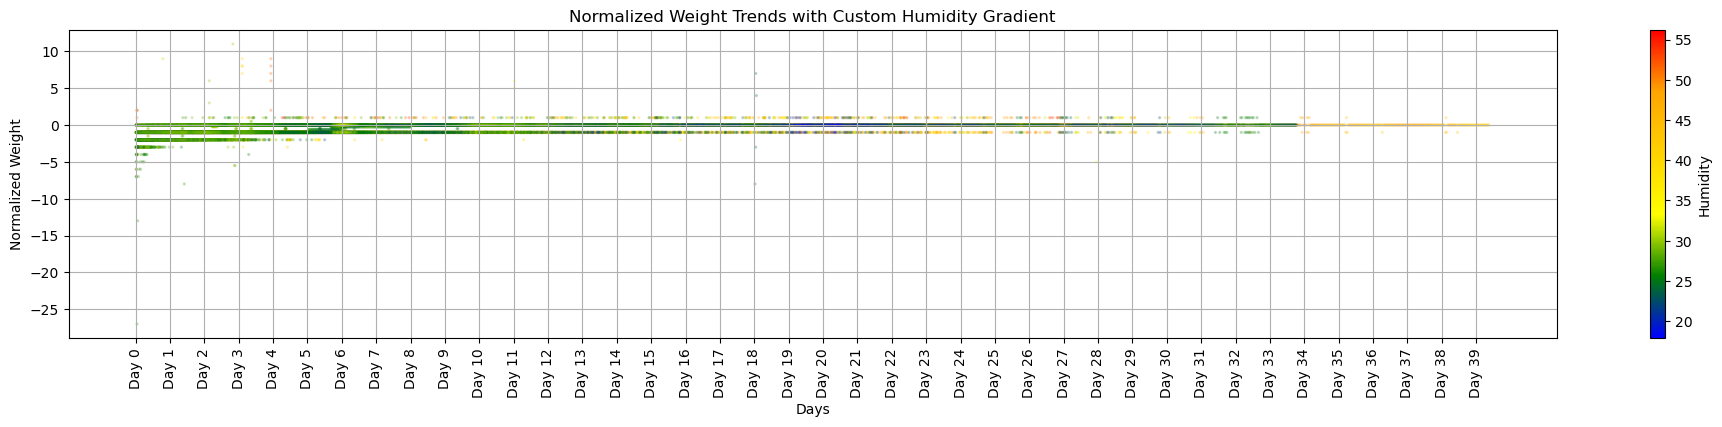

In [121]:
# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Only needed for ScalarMappable to work with colorbar

fig, ax = plt.subplots(figsize=(24, 4))  # Create the main plot

# Iterate through each DataFrame and plot
for df in dfs:
    # Identify the Weight column (find column that starts with 'Weight_')
    # Normalize Humidity
    df['Humidity'] = df['Humidity'].clip(lower=min_humidity, upper=max_humidity)  # Clip values to the range

    # Map humidity to color
    colors = custom_cmap(norm(df['Humidity']))
    
    # Scatter plot with gradient colors
    plt.scatter(df.index, df['Weight_Difference'], c=colors, s=2, alpha=0.2, label="Weight_Difference")

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Humidity')

# Set x-axis ticks
tick_locator = MaxNLocator(integer=True, prune='lower', nbins=max_length//48)
ax.xaxis.set_major_locator(tick_locator)
ax.set_xticks(np.arange(0, max_length, 48))
ax.set_xticklabels([f'Day {i//48 + 0}' for i in range(0, max_length, 48)], rotation=90)

ax.grid(True) 

plt.xlabel('Days')
plt.ylabel('Normalized Weight')
plt.title('Normalized Weight Trends with Custom Humidity Gradient')

# Optionally add a legend
# plt.legend(title='Weight Column')

plt.show()

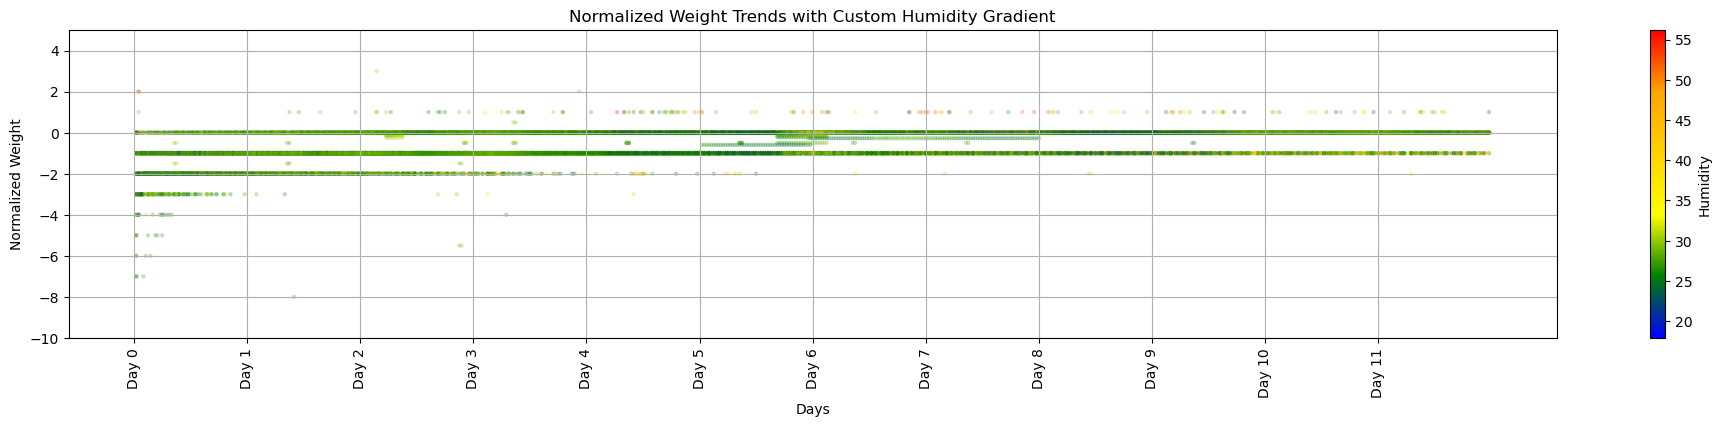

In [131]:
# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Only needed for ScalarMappable to work with colorbar

fig, ax = plt.subplots(figsize=(24, 4))  # Create the main plot

# Define the range to plot (first 4 days)
start_index = 0
end_index = 12 * 48  # 4 days worth of data

# Iterate through each DataFrame and plot
for df in dfs:
    # Identify the Weight column (find column that starts with 'Weight_')
    # Normalize Humidity
    df['Humidity'] = df['Humidity'].clip(lower=min_humidity, upper=max_humidity)  # Clip values to the range

    # Filter the DataFrame to include only the first 4 days
    df_filtered = df.iloc[start_index:end_index]
    
    # Map humidity to color
    colors = custom_cmap(norm(df_filtered['Humidity']))
    
    # Scatter plot with gradient colors
    plt.scatter(df_filtered.index, df_filtered['Weight_Difference'], c=colors, s=5, alpha=0.2, label="Weight_Difference")

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Humidity')

# Set x-axis ticks
tick_locator = MaxNLocator(integer=True, prune='lower', nbins=end_index//48)
ax.xaxis.set_major_locator(tick_locator)
ax.set_xticks(np.arange(0, end_index, 48))
ax.set_xticklabels([f'Day {i//48 + 0}' for i in range(0, end_index, 48)], rotation=90)

# Set y-axis limits
ax.set_ylim(-10, 5)

ax.grid(True) 

plt.xlabel('Days')
plt.ylabel('Normalized Weight')
plt.title('Normalized Weight Trends with Custom Humidity Gradient')

# Optionally add a legend
# plt.legend(title='Weight Column')

plt.show()

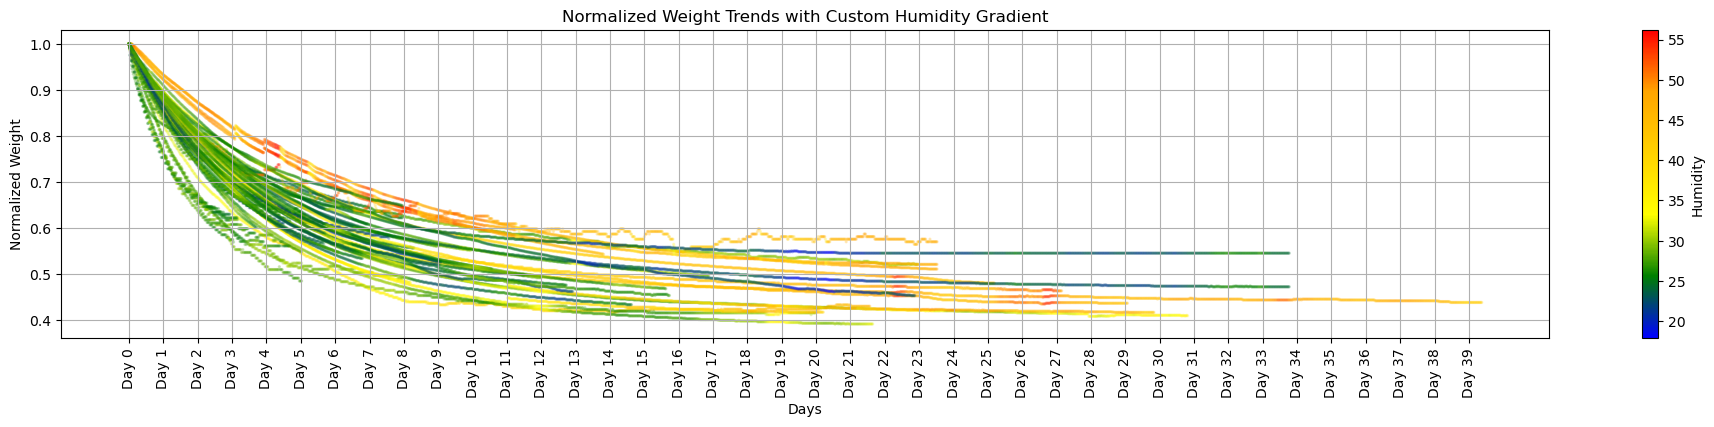

In [113]:
# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Only needed for ScalarMappable to work with colorbar

fig, ax = plt.subplots(figsize=(24, 4))  # Create the main plot

# Iterate through each DataFrame and plot
for df in dfs:
    # Identify the Weight column (find column that starts with 'Weight_')
    weight_cols = [col for col in df.columns if col.startswith('Weight_')]
    
    if weight_cols:
        weight_col = weight_cols[0]  # Assuming only one Weight column per DataFrame
        
        # Normalize the Weight column
        df['Normalized_Weight'] =  ( df[weight_col]/df[weight_col].max())
        
        # Normalize Humidity
        df['Humidity'] = df['Humidity'].clip(lower=min_humidity, upper=max_humidity)  # Clip values to the range

        # Map humidity to color
        colors = custom_cmap(norm(df['Humidity']))
        
        # Scatter plot with gradient colors
        plt.scatter(df.index, df['Normalized_Weight'], c=colors, s=2, alpha=0.2, label=weight_col)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Humidity')

# Set x-axis ticks
tick_locator = MaxNLocator(integer=True, prune='lower', nbins=max_length//48)
ax.xaxis.set_major_locator(tick_locator)
ax.set_xticks(np.arange(0, max_length, 48))
ax.set_xticklabels([f'Day {i//48 + 0}' for i in range(0, max_length, 48)], rotation=90)

ax.grid(True) 

plt.xlabel('Days')
plt.ylabel('Normalized Weight')
plt.title('Normalized Weight Trends with Custom Humidity Gradient')

# Optionally add a legend
# plt.legend(title='Weight Column')

plt.show()

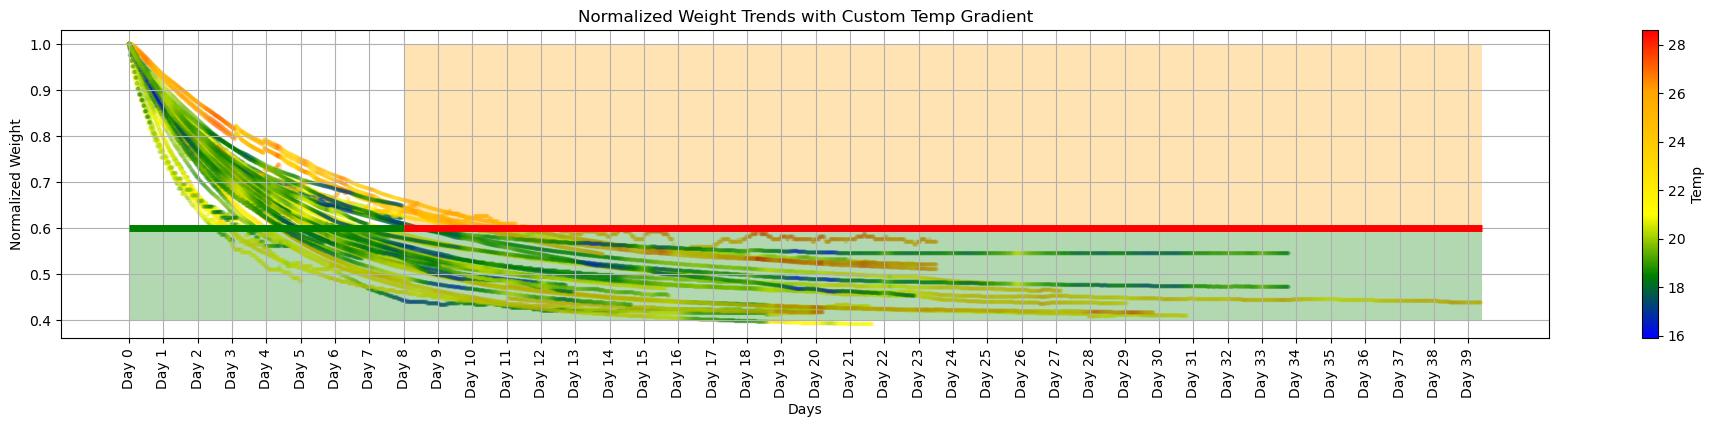

In [110]:
# Define normalization for colormap
norm = Normalize(vmin=min_temp, vmax=max_temp)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Only needed for ScalarMappable to work with colorbar

fig, ax = plt.subplots(figsize=(24, 4))  # Create the main plot

# Iterate through each DataFrame and plot
for df in dfs:
    # Identify the Weight column (find column that starts with 'Weight_')
    weight_cols = [col for col in df.columns if col.startswith('Weight_')]
    
    if weight_cols:
        weight_col = weight_cols[0]  # Assuming only one Weight column per DataFrame
        
        # Normalize the Weight column
        df['Normalized_Weight'] =  ( df[weight_col]/df[weight_col].max())
        
        # Normalize Humidity
        df['Temp'] = df['Temp'].clip(lower=min_temp, upper=max_temp)  # Clip values to the range

        # Map humidity to color
        colors = custom_cmap(norm(df['Temp']))
        
        # Scatter plot with gradient colors
        plt.scatter(df.index, df['Normalized_Weight'], c=colors, s=5, alpha=0.2, label=weight_col)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Temp')

# Add transparent green box
green_rect = patches.Rectangle(
    (0, 0.4),  # Bottom-left corner (x, y)
    max_length,  # Width (number of ticks for 5 days)
    0.2,     # Height
    linewidth=1, edgecolor='none', facecolor='green', alpha=0.3)  # Adjust transparency with alpha
ax.add_patch(green_rect)

# Add transparent orange box
orange_limit_start = 48*8
orange_rect = patches.Rectangle(
    (orange_limit_start, 0.6),  # Bottom-left corner (x, y)
    max_length-orange_limit_start,  # Width (number of ticks for 5 days)
    0.4,     # Height
    linewidth=1, edgecolor='none', facecolor='orange', alpha=0.3)  # Adjust transparency with alpha
ax.add_patch(orange_rect)

# Adding the green horizontal line
ax.hlines(xmin=0*48,xmax=8*48,y=0.6, color='green', linestyle='-', linewidth=5, label='Threshold Line')
ax.hlines(xmin=8*48,xmax=max_length,y=0.6, color='red', linestyle='-', linewidth=5, label='Threshold Line')

# Set x-axis ticks
tick_locator = MaxNLocator(integer=True, prune='lower', nbins=max_length//48)
ax.xaxis.set_major_locator(tick_locator)
ax.set_xticks(np.arange(0, max_length, 48))
ax.set_xticklabels([f'Day {i//48 + 0}' for i in range(0, max_length, 48)], rotation=90)

ax.grid(True) 

plt.xlabel('Days')
plt.ylabel('Normalized Weight')
plt.title('Normalized Weight Trends with Custom Temp Gradient')

# Optionally add a legend
# plt.legend(title='Weight Column')

plt.show()

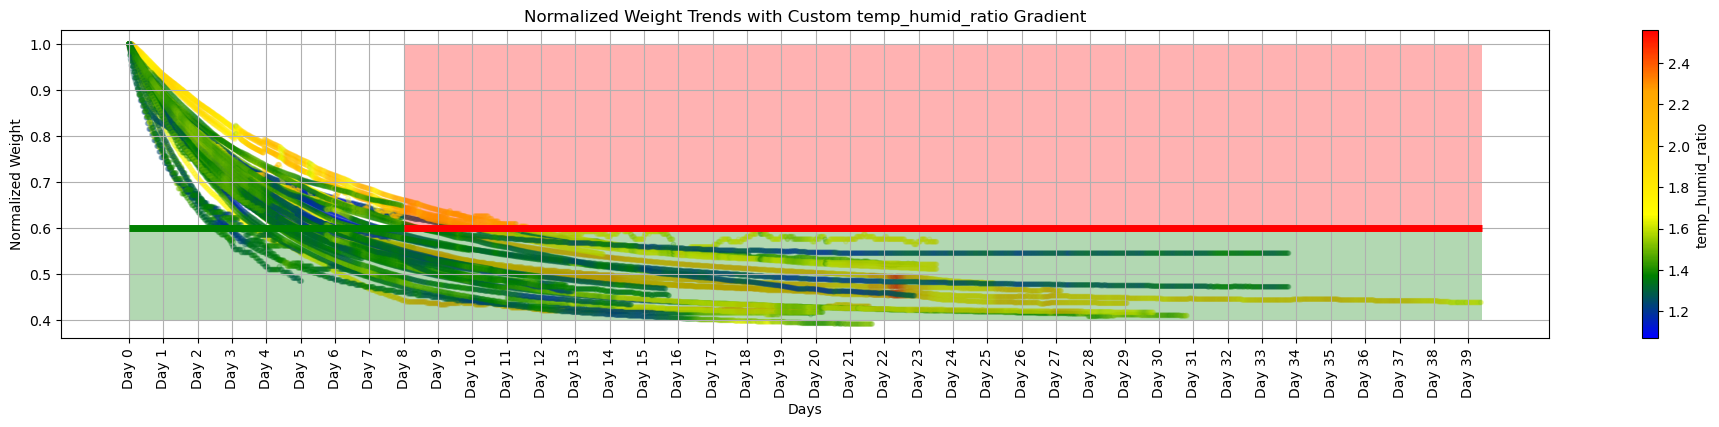

In [111]:
# Define normalization for colormap
norm = Normalize(vmin=min_temp_humid_ratio, vmax=max_temp_humid_ratio)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Only needed for ScalarMappable to work with colorbar

fig, ax = plt.subplots(figsize=(24, 4))  # Create the main plot

# Iterate through each DataFrame and plot
for df in dfs:
    # Identify the Weight column (find column that starts with 'Weight_')
    weight_cols = [col for col in df.columns if col.startswith('Weight_')]
    
    if weight_cols:
        weight_col = weight_cols[0]  # Assuming only one Weight column per DataFrame
        
        # Normalize the Weight column
        df['Normalized_Weight'] =  ( df[weight_col]/df[weight_col].max())
        
        # Normalize Humidity
        df['Temp_Humidity_Ratio'] = df['Temp_Humidity_Ratio'].clip(lower=min_temp_humid_ratio, upper=max_temp_humid_ratio)  # Clip values to the range

        # Map humidity to color
        colors = custom_cmap(norm(df['Temp_Humidity_Ratio']))
        
        # Scatter plot with gradient colors
        plt.scatter(df.index, df['Normalized_Weight'], c=colors, s=10, alpha=0.2, label=weight_col)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('temp_humid_ratio')

# Add transparent green box
green_rect = patches.Rectangle(
    (0, 0.4),  # Bottom-left corner (x, y)
    max_length,  # Width (number of ticks for 5 days)
    0.2,     # Height
    linewidth=1, edgecolor='none', facecolor='green', alpha=0.3)  # Adjust transparency with alpha
ax.add_patch(green_rect)

# Add transparent orange box
orange_limit_start = 48*8
orange_rect = patches.Rectangle(
    (orange_limit_start, 0.6),  # Bottom-left corner (x, y)
    max_length-orange_limit_start,  # Width (number of ticks for 5 days)
    0.4,     # Height
    linewidth=1, edgecolor='none', facecolor='red', alpha=0.3)  # Adjust transparency with alpha
ax.add_patch(orange_rect)

# Adding the green horizontal line
ax.hlines(xmin=0*48,xmax=8*48,y=0.6, color='green', linestyle='-', linewidth=5, label='Threshold Line')
ax.hlines(xmin=8*48,xmax=max_length,y=0.6, color='red', linestyle='-', linewidth=5, label='Threshold Line')

# Set x-axis ticks
tick_locator = MaxNLocator(integer=True, prune='lower', nbins=max_length//48)
ax.xaxis.set_major_locator(tick_locator)
ax.set_xticks(np.arange(0, max_length, 48))
ax.set_xticklabels([f'Day {i//48 + 0}' for i in range(0, max_length, 48)], rotation=90)

ax.grid(True) 

plt.xlabel('Days')
plt.ylabel('Normalized Weight')
plt.title('Normalized Weight Trends with Custom temp_humid_ratio Gradient')

# Optionally add a legend
# plt.legend(title='Weight Column')

plt.show()

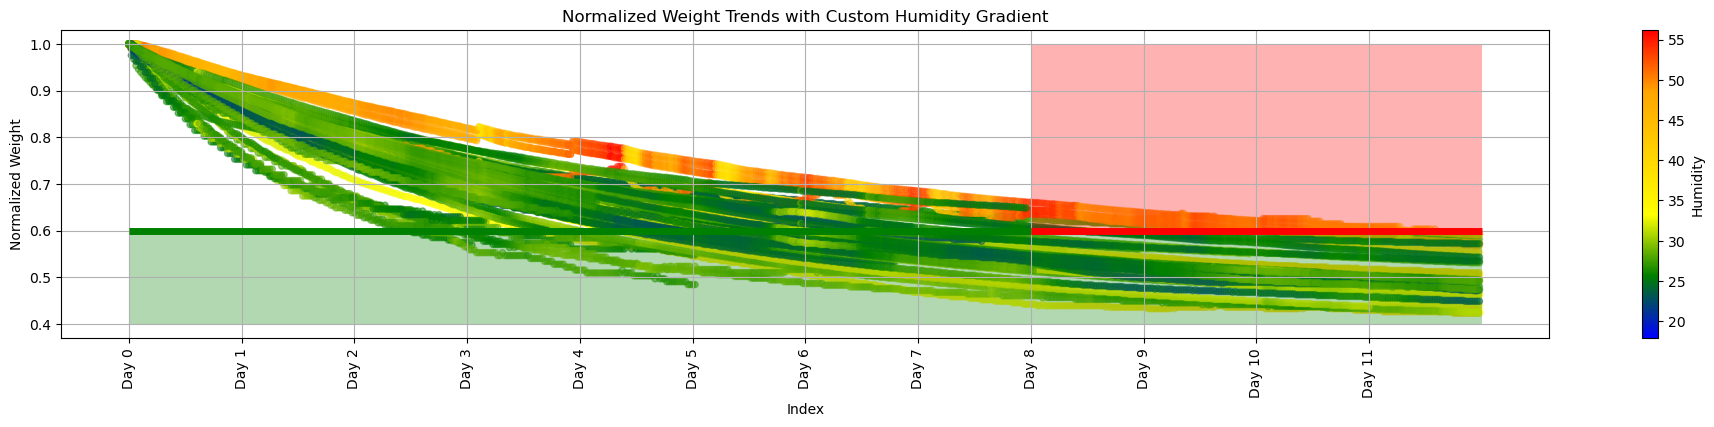

In [112]:
# Define normalization for colormap
norm = Normalize(vmin=min_humidity, vmax=max_humidity)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Only needed for ScalarMappable to work with colorbar

fig, ax = plt.subplots(figsize=(24, 4))  # Create the main plot

# Define the range to plot (first 4 days)
start_index = 0
end_index = 12 * 48  # 4 days worth of data

# Iterate through each DataFrame and plot
for df in dfs:
    # Identify the Weight column (find column that starts with 'Weight_')
    weight_cols = [col for col in df.columns if col.startswith('Weight_')]
    
    if weight_cols:
        weight_col = weight_cols[0]  # Assuming only one Weight column per DataFrame
        
        # Normalize the Weight column
        df['Normalized_Weight'] = (df[weight_col] / df[weight_col].max())
        
        # Normalize Humidity
        df['Humidity'] = df['Humidity'].clip(lower=min_humidity, upper=max_humidity)  # Clip values to the range min-max

        # Filter the DataFrame to include only the first 4 days
        df_filtered = df.iloc[start_index:end_index]

        # Map humidity to color
        colors = custom_cmap(norm(df_filtered['Humidity']))
        
        # Scatter plot with gradient colors
        plt.scatter(df_filtered.index, df_filtered['Normalized_Weight'], c=colors, s=20, alpha=0.5, label=weight_col)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Humidity')

# Add transparent green box
green_rect = patches.Rectangle(
    (0, 0.4),  # Bottom-left corner (x, y)
    end_index,  # Width (number of ticks for 5 days)
    0.2,     # Height
    linewidth=1, edgecolor='none', facecolor='green', alpha=0.3)  # Adjust transparency with alpha
ax.add_patch(green_rect)

# Add transparent orange box
orange_limit_start = 48*8
orange_rect = patches.Rectangle(
    (orange_limit_start, 0.6),  # Bottom-left corner (x, y)
    end_index-orange_limit_start,  # Width (number of ticks for 5 days)
    0.4,     # Height
    linewidth=1, edgecolor='none', facecolor='red', alpha=0.3)  # Adjust transparency with alpha
ax.add_patch(orange_rect)

# Adding the green horizontal line
ax.hlines(xmin=0*48,xmax=8*48,y=0.6, color='green', linestyle='-', linewidth=5, label='Threshold Line')
ax.hlines(xmin=8*48,xmax=end_index,y=0.6, color='red', linestyle='-', linewidth=5, label='Threshold Line')

# Set x-ticks at intervals of 48
tick_positions = range(start_index, end_index, 48)
tick_labels = [f'Day {i // 48 + 0}' for i in tick_positions]

# Apply the ticks and labels to the x-axis
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=90)  # Rotate labels if needed

# Add grid
ax.grid(True)  # Adds grid lines

plt.xlabel('Index')
plt.ylabel('Normalized Weight')
plt.title('Normalized Weight Trends with Custom Humidity Gradient')

# Optionally add a legend
# plt.legend(title='Weight Column')

plt.show()

In [95]:
try:
    client
except NameError:
    print("No dask client defined, nothing to shut down.")
else:
    print("Shutting down the Dask client.")
    client.close()
    del client

Shutting down the Dask client.
